In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [4]:
def load_vis(file):
    with open(file, 'r') as f:
        trainer_state = json.load(f)

    log_history = trainer_state['log_history']

    df = pd.DataFrame(log_history)

    df_eval = df[df['eval_loss'].notnull()]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    sns.lineplot(x='epoch', y='eval_mape', data=df_eval, marker='o', color='tab:red', ax=ax1)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('MAPE', color='tab:red')
    ax1.set_title('MAPE over epochs')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    sns.lineplot(x='epoch', y='eval_rougeLsum', data=df_eval, marker='o', color='tab:blue', ax=ax2)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('ROUGE-L sum', color='tab:blue')
    ax2.set_title('ROUGE-L sum over epochs')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    fig.tight_layout()

    return plt, df


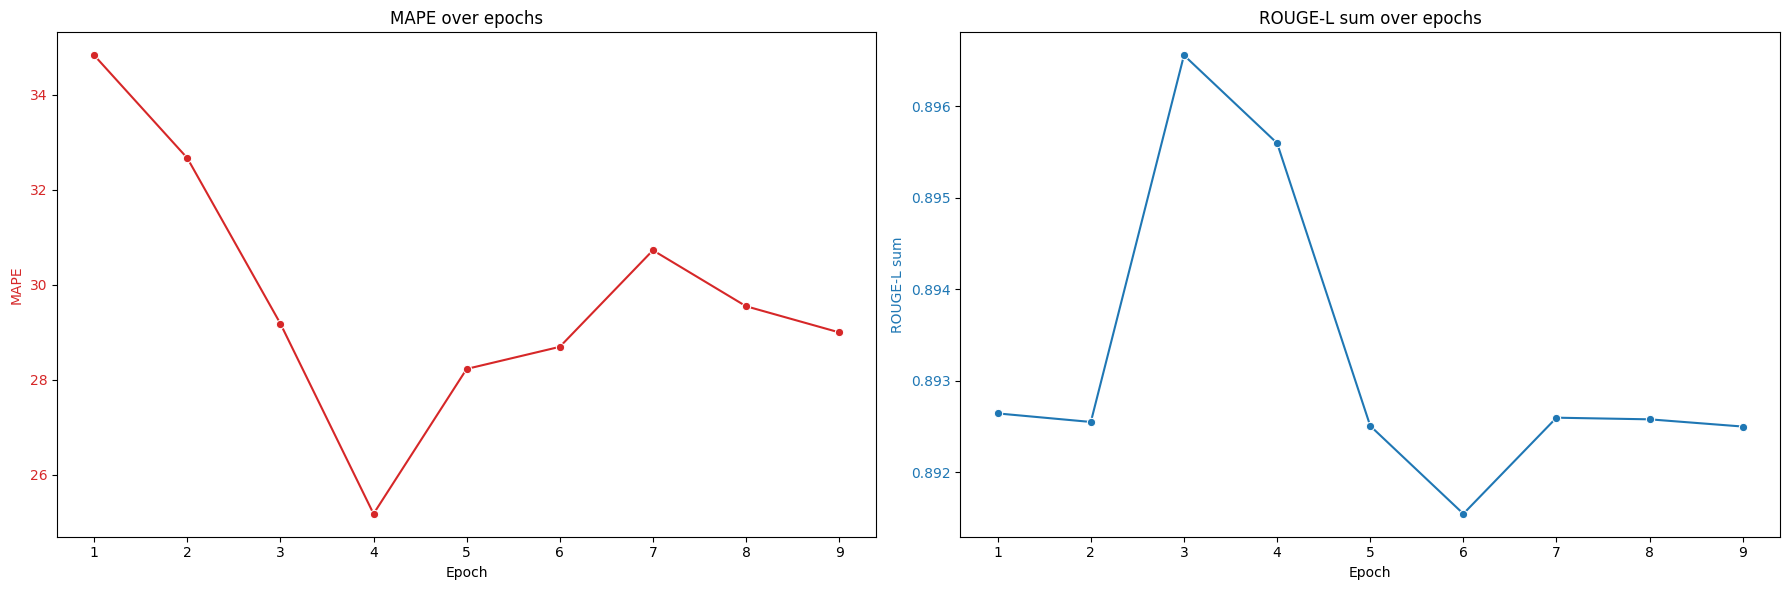

In [5]:
# with open('results/checkpoint-710/trainer_state.json', 'r') as f:
#     trainer_state = json.load(f)

# log_history = trainer_state['log_history']

# df = pd.DataFrame(log_history)

# df

plt, df = load_vis('results/checkpoint-710/trainer_state.json')

plt.show()

## Summary of Model Performance Evaluation

The primary metrics of interest were the Mean Absolute Percentage Error (MAPE) and ROUGE-Lsum. The results collected from checkpoint-710 are summarized as follows:

### Observation

MAPE: There was a noticeable improvement in MAPE over the epochs, with the lowest MAPE observed at epoch 4 (25.175587).
ROUGE-Lsum: The ROUGE-Lsum scores remained relatively stable throughout the training, with only minor fluctuations. The highest ROUGE-Lsum score was observed at epoch 3 (0.896554).

### Notes

Given that the ROUGE-Lsum scores showed minimal change across the epochs, with the most significant improvement seen in the MAPE, we decided to use MAPE as the primary metric for selecting the best model. The model checkpoint from epoch 4, which had the lowest MAPE (25.175587), will be chosen as the best model. This decision primarily focuses on improving the model's numerical accuracy to provide accurate price recommendations.


# Using the best model

I re-ran `3_fine_tune.ipynb` again with the following trainer args:

```
   load_best_model_at_end=True,
   metric_for_best_model="eval_mape",
   greater_is_better=False if "eval_mape" else True
```

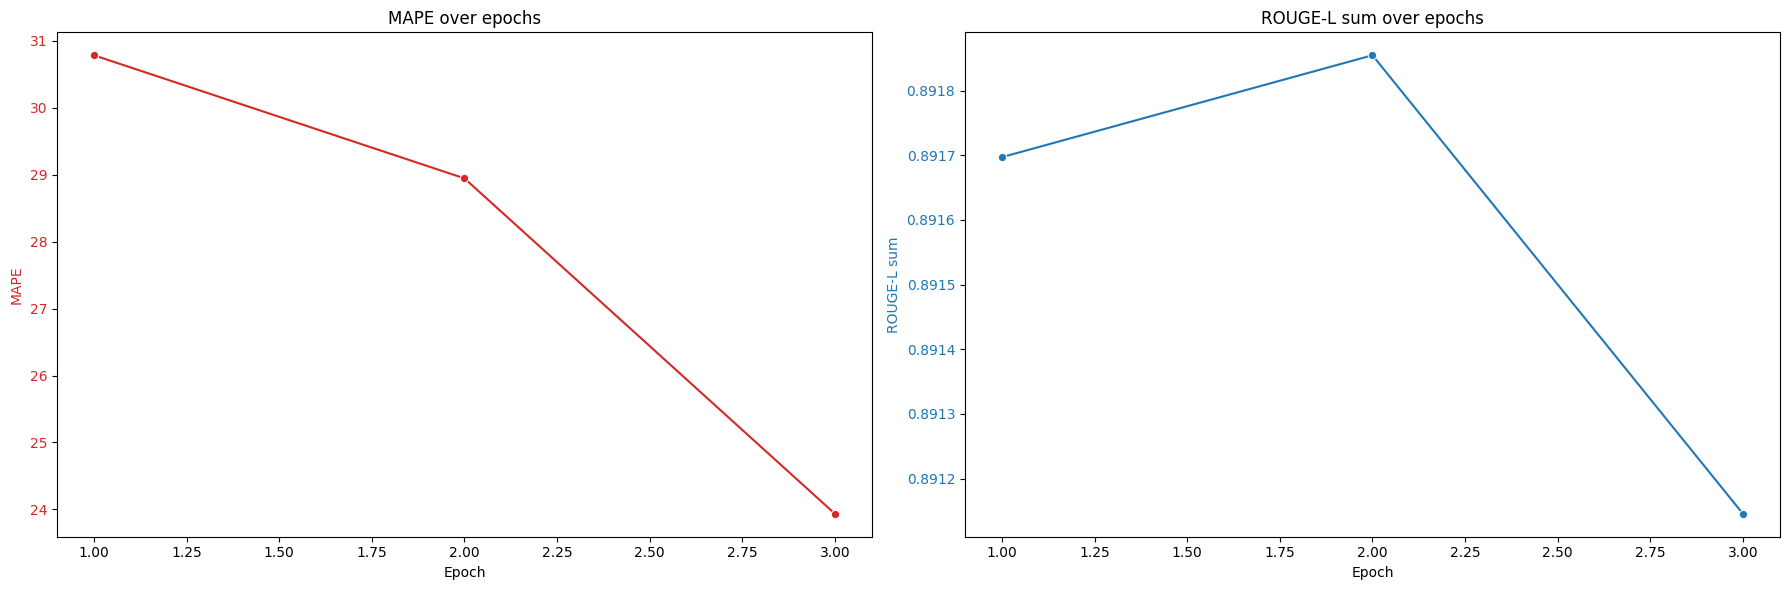

In [7]:
plt, df = load_vis('results/checkpoint-213/trainer_state.json')

plt.show()

In [9]:
df[['eval_mape', 'eval_rougeLsum']]

,eval_mape,eval_rougeLsum
0,30.780433,0.891697
1,28.942627,0.891855
2,23.935643,0.891145
